# Import necessary libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plottert_lib
import PIL as image_lib
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception

In [40]:
dataset_path = '/kaggle/input/braim-image/Training'

In [41]:
import os

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        image_count = sum([len(files) for _, _, files in os.walk(folder_path)])
        print(f"Folder '{folder_name}' contains {image_count} images.")


Folder 'no_tumor' contains 3462 images.
Folder 'pituitary_tumor' contains 6809 images.
Folder 'meningioma_tumor' contains 7328 images.
Folder 'glioma_tumor' contains 7233 images.


In [42]:
import os
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        image_count = sum([len(files) for _, _, files in os.walk(folder_path)])
        print(f"Folder '{folder_name}' contains {image_count} images.")

Folder 'no_tumor' contains 3462 images.
Folder 'pituitary_tumor' contains 6809 images.
Folder 'meningioma_tumor' contains 7328 images.
Folder 'glioma_tumor' contains 7233 images.


# Splitting in two Training and Validation

In [43]:
import tensorflow as tf

# Define the path to your dataset directory
data_directory = '/kaggle/input/braim-image/Training'

img_height, img_width = 224, 224
batch_size = 32

# Load both training and validation datasets with 80% for training and 20% for validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 24832 files belonging to 4 classes.
Using 19866 files for training.
Found 24832 files belonging to 4 classes.
Using 4966 files for validation.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception

custom_Xception_model = Sequential()

# Load the pre-trained ResNet50 model without the top layer
pretrained_model = Xception(include_top=False,
                                  weights='imagenet',
                                  input_shape=(224, 224, 3),
                                  pooling='avg',
                                  classes=4)

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained model to the custom model
custom_Xception_model.add(pretrained_model)

# Add a Dense layer with softmax activation for classification
custom_Xception_model.add(Dense(4, activation='softmax'))

custom_Xception_model.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

# Print model summary
custom_Xception_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [45]:
epochs = 10
# Compile the model
custom_Xception_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = custom_Xception_model.fit(train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.5088 - loss: 1.4787 - val_accuracy: 0.6708 - val_loss: 0.8674
Epoch 2/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6865 - loss: 0.8261 - val_accuracy: 0.7046 - val_loss: 0.7605
Epoch 3/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 83ms/step - accuracy: 0.7245 - loss: 0.7178 - val_accuracy: 0.7014 - val_loss: 0.7911
Epoch 4/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7378 - loss: 0.6820 - val_accuracy: 0.7582 - val_loss: 0.6802
Epoch 5/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7537 - loss: 0.6571 - val_accuracy: 0.7422 - val_loss: 0.7292
Epoch 6/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7597 - loss: 0.6243 - val_accuracy: 0.7330 - val_loss: 0.8147
Epoch 7/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7651 - loss: 0.6217 - val_accuracy: 0.7449 - val_loss: 0.7123
Epoch 8/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7689 - loss: 0.6010 - 

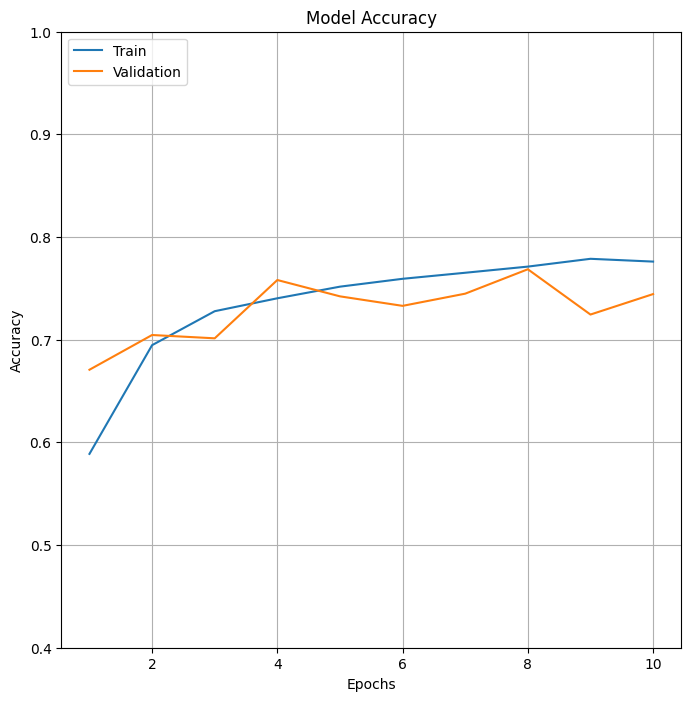

<Figure size 640x480 with 0 Axes>

In [46]:

import matplotlib.pyplot as plt

epochs = 10

plt.figure(figsize=(8, 8))

epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')

plt.ylim(0.4, 1.0)
plt.grid(True)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
plt.savefig('output-plot.png')


In [47]:
import numpy as np
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(custom_Xception_model.predict(x), axis=1))

target_names = ['glioma','meningioma_tumor','no_tumor','pituitary_tumor']

print(classification_report(y_true, y_pred, target_names=target_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

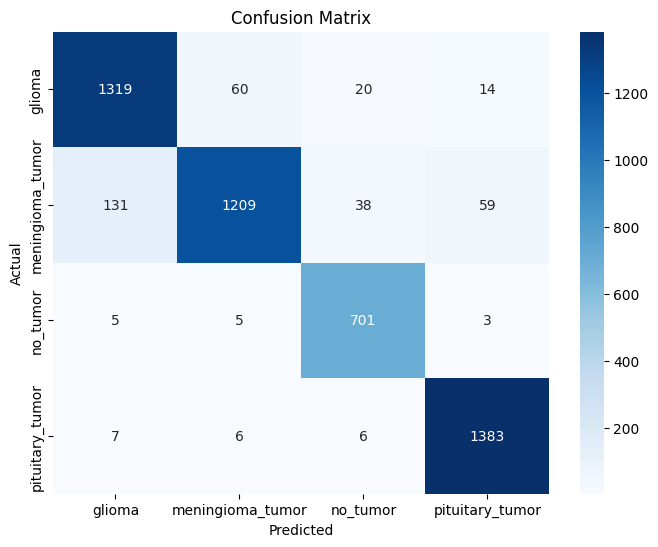

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['glioma','meningioma_tumor','no_tumor','pituitary_tumor']
y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(custom_ResNet50_model.predict(x), axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

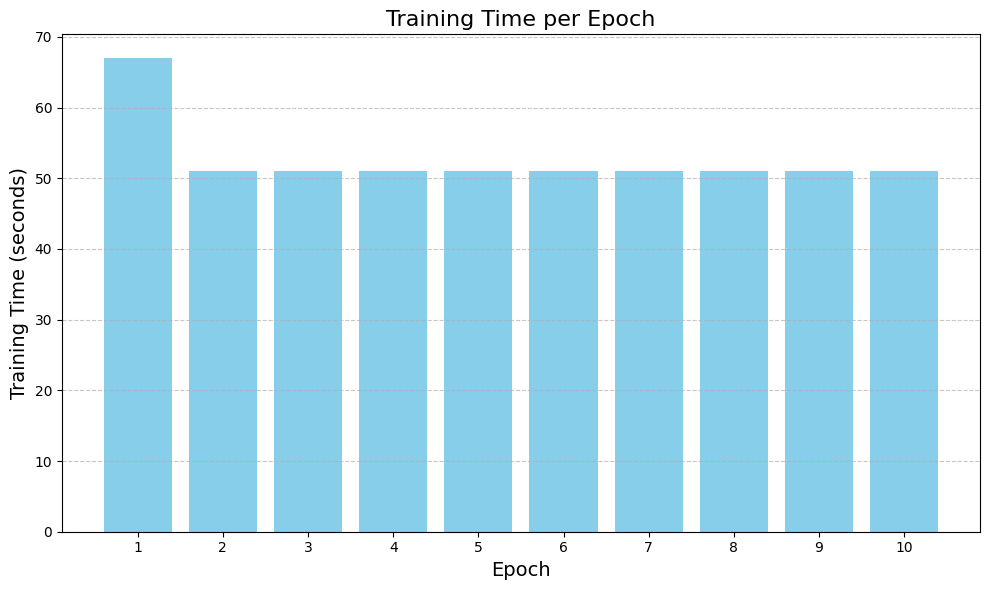

In [50]:
import matplotlib.pyplot as plt

# Epoch data extracted from the training logs
epochs = list(range(1, 11))
training_time = [67, 51, 51, 51, 51, 51, 51, 51, 51, 51]  # Training times in seconds

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(epochs, training_time, color='skyblue')

# Adding labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.title('Training Time per Epoch', fontsize=16)
plt.xticks(epochs)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()

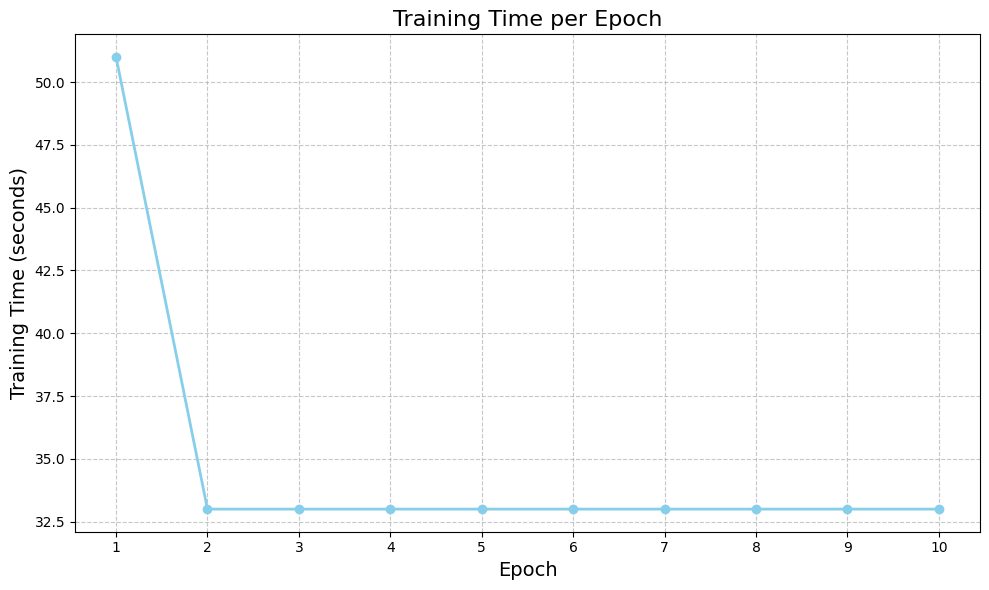

In [38]:
import matplotlib.pyplot as plt

# Epoch data extracted from the training logs
epochs = list(range(1, 11))
training_time = [51, 33, 33, 33, 33, 33, 33, 33, 33, 33]  # Training times in seconds

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_time, marker='o', color='skyblue', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.title('Training Time per Epoch', fontsize=16)
plt.xticks(epochs)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the line graph
plt.tight_layout()
plt.show()